# Exploring SVMs Using Sklearn


---

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
import pandas as pd
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

### 1. Load the handwritten digits dataset.

In [3]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

1797
64


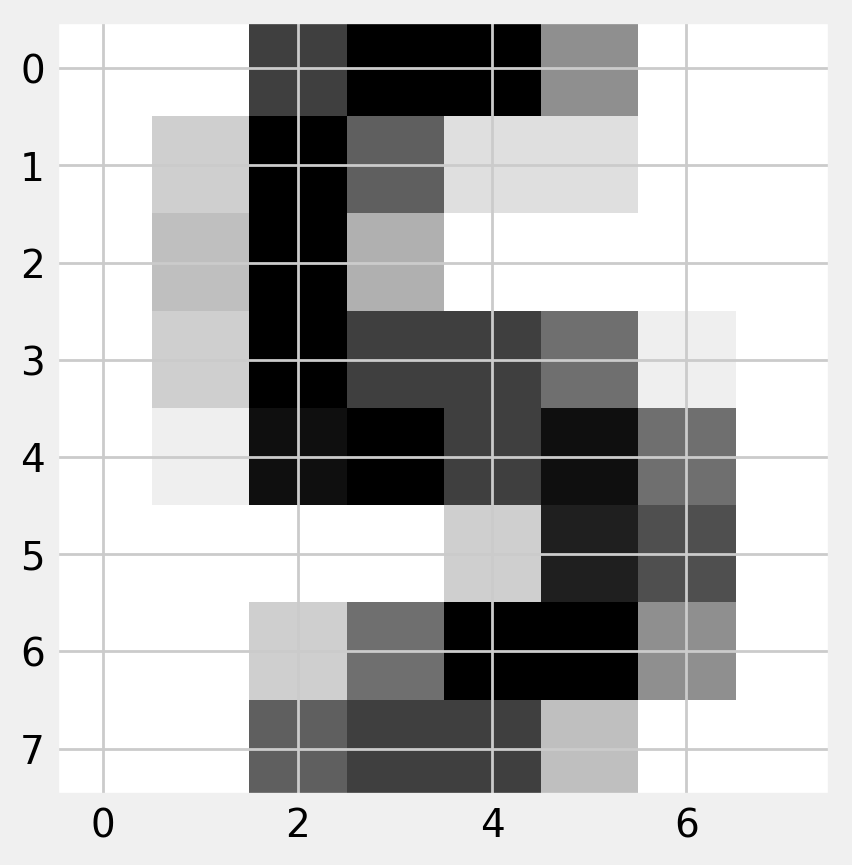

In [4]:
print(len(digits.data))      # 1,797 observations
print(len(digits.data[0]))   # 8 x 8 pixel image

# the number 9
plt.imshow(digits.images[-21], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [5]:
digits.target[-21]

5

In [6]:
X, y = digits.data, digits.target

### 2. Cross-validate a logistic regression on the data.

In [7]:
# A:
logistic = linear_model.LogisticRegression()
scores = cross_val_score(logistic, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[0.92222222 0.86944444 0.94150418 0.93871866 0.89693593]


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9137650882079852

### 3. Cross-validate a SVM on the data.

Hint: Check what is the default kernel used. Try some of the alternatives.

In [8]:
clf = svm.SVC()
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]


0.9632838130609718

In [9]:
# A:
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.96388889 0.91944444 0.96657382 0.9637883  0.92479109]


0.9476973073351903

In [10]:
clf = svm.SVC(kernel='poly', degree=3)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.98333333 0.95       0.98607242 0.98607242 0.94707521]


0.9705106778087279

## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.
- Small gamma: The model is constrained and can under-fit!  It has high bias and low variance.
- Large gamma: The model tries to capture the shape too well: it can over-fit!  It has low bias and high variance.



### C

`C` is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. `C` can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.
- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

### 4. Fit an SVM modifying the default gamma and C.

In [11]:
1 / X.shape[1]

0.015625

In [12]:
# A:
clf = svm.SVC(gamma=.001, C=1)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.975      0.95       0.98328691 0.99164345 0.96100279]


0.9721866295264624

In [13]:
np.logspace(-5,-2,20)

array([1.00000000e-05, 1.43844989e-05, 2.06913808e-05, 2.97635144e-05,
       4.28133240e-05, 6.15848211e-05, 8.85866790e-05, 1.27427499e-04,
       1.83298071e-04, 2.63665090e-04, 3.79269019e-04, 5.45559478e-04,
       7.84759970e-04, 1.12883789e-03, 1.62377674e-03, 2.33572147e-03,
       3.35981829e-03, 4.83293024e-03, 6.95192796e-03, 1.00000000e-02])

################################################################################################################################

### 5. Gridsearch an optimal gamma with C=1.

In [14]:
# A:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(C=1, random_state=42)
gamma_values = np.logspace(-5,1,10)
param_grid = dict(gamma=gamma_values)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(C=1, random_state=42),
             param_grid={'gamma': array([1.00000000e-05, 4.64158883e-05, 2.15443469e-04, 1.00000000e-03,
       4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 4.64158883e-01,
       2.15443469e+00, 1.00000000e+01])},
             scoring='accuracy')

In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140643,0.027336,0.070882,0.008576,0.00001,{'gamma': 1e-05},0.888889,0.852778,0.891365,0.938719,0.855153,0.885381,0.031208,5
1,0.078138,0.017674,0.063551,0.022188,0.000046,{'gamma': 4.641588833612782e-05},0.919444,0.911111,0.961003,0.972145,0.894150,0.931571,0.029928,3
2,0.071667,0.010176,0.048434,0.008816,0.000215,{'gamma': 0.00021544346900318823},0.952778,0.933333,0.980501,0.988858,0.933148,0.957724,0.023287,2
3,0.077171,0.010796,0.037558,0.007268,0.001,{'gamma': 0.001},0.975000,0.950000,0.983287,0.991643,0.961003,0.972187,0.015013,1
4,0.240959,0.012518,0.065008,0.003561,0.004642,{'gamma': 0.004641588833612777},0.908333,0.861111,0.935933,0.958217,0.916435,0.916006,0.032408,4
5,0.236080,0.012977,0.073510,0.006919,0.021544,{'gamma': 0.021544346900318822},0.216667,0.191667,0.267409,0.289694,0.311978,0.255483,0.044908,6
6,0.212933,0.013181,0.063981,0.005063,0.1,{'gamma': 0.1},0.100000,0.100000,0.105850,0.103064,0.105850,0.102953,0.002617,8
7,0.322411,0.016463,0.105423,0.009283,0.464159,{'gamma': 0.46415888336127725},0.100000,0.100000,0.103064,0.100279,0.103064,0.101281,0.001459,9
8,0.316584,0.020303,0.077652,0.003726,2.154435,{'gamma': 2.154434690031882},0.100000,0.100000,0.103064,0.147632,0.144847,0.119109,0.022198,7
9,0.319714,0.023730,0.078121,0.001194,10.0,{'gamma': 10.0},0.100000,0.100000,0.105850,0.100279,0.100279,0.101281,0.002288,9


In [16]:
grid.best_score_

0.9721866295264624

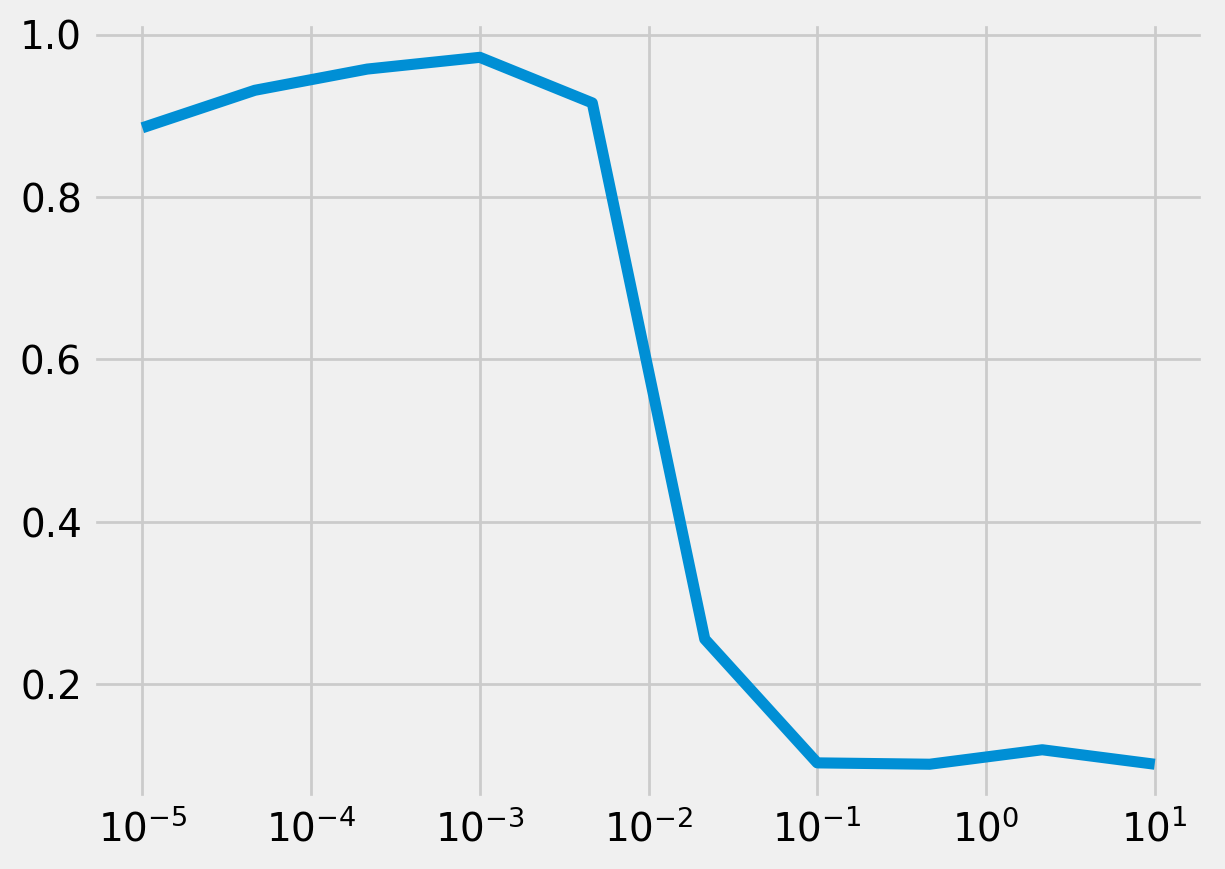

In [17]:
df = pd.DataFrame(grid.cv_results_)
df['g'] = [x['gamma'] for x in df.params.values]
plt.plot(gamma_values, df.mean_test_score)
plt.xscale('log')

### 6. Gridsearch the optimal C, gamma, and kernel.

In [ ]:
# A:
clf = svm.SVC(C=1, random_state=42)
param_grid = {
    'gamma': np.logspace(-5,2,10), 
    'C': np.logspace(-3, 3, 10),
    'degree': [2,3,4],
    'kernel': ['rbf', 'linear', 'poly']
}
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

### 7. Import the iris dataset.

In [28]:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

In [32]:
assert iris_X.shape[0] == iris_y.shape[0]
print(iris_X.shape)
print(iris_y.shape)

(150, 2)
(150,)


### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [25]:
# A:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr_cv_scores = cross_val_score(lr, iris_X, iris_y, cv=5)  # 5-fold cross-validation

print('Cross-validation scores for Logistic Regression:', lr_cv_scores)
print('Average cross-validation score for Logistic Regression:', lr_cv_scores.mean())

# Support Vector Machine
svm = SVC()
svm_cv_scores = cross_val_score(svm, iris_X, iris_y, cv=5)  # 5-fold cross-validation

print('Cross-validation scores for SVM:', svm_cv_scores)
print('Average cross-validation score for SVM:', svm_cv_scores.mean())


Cross-validation scores for Logistic Regression: [0.73333333 0.83333333 0.76666667 0.86666667 0.86666667]
Average cross-validation score for Logistic Regression: 0.8133333333333332
Cross-validation scores for SVM: [0.73333333 0.86666667 0.76666667 0.86666667 0.86666667]
Average cross-validation score for SVM: 0.82


### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

Hint: For visual comparison, use only two of the iris features, e.g. sepal length and sepal width.

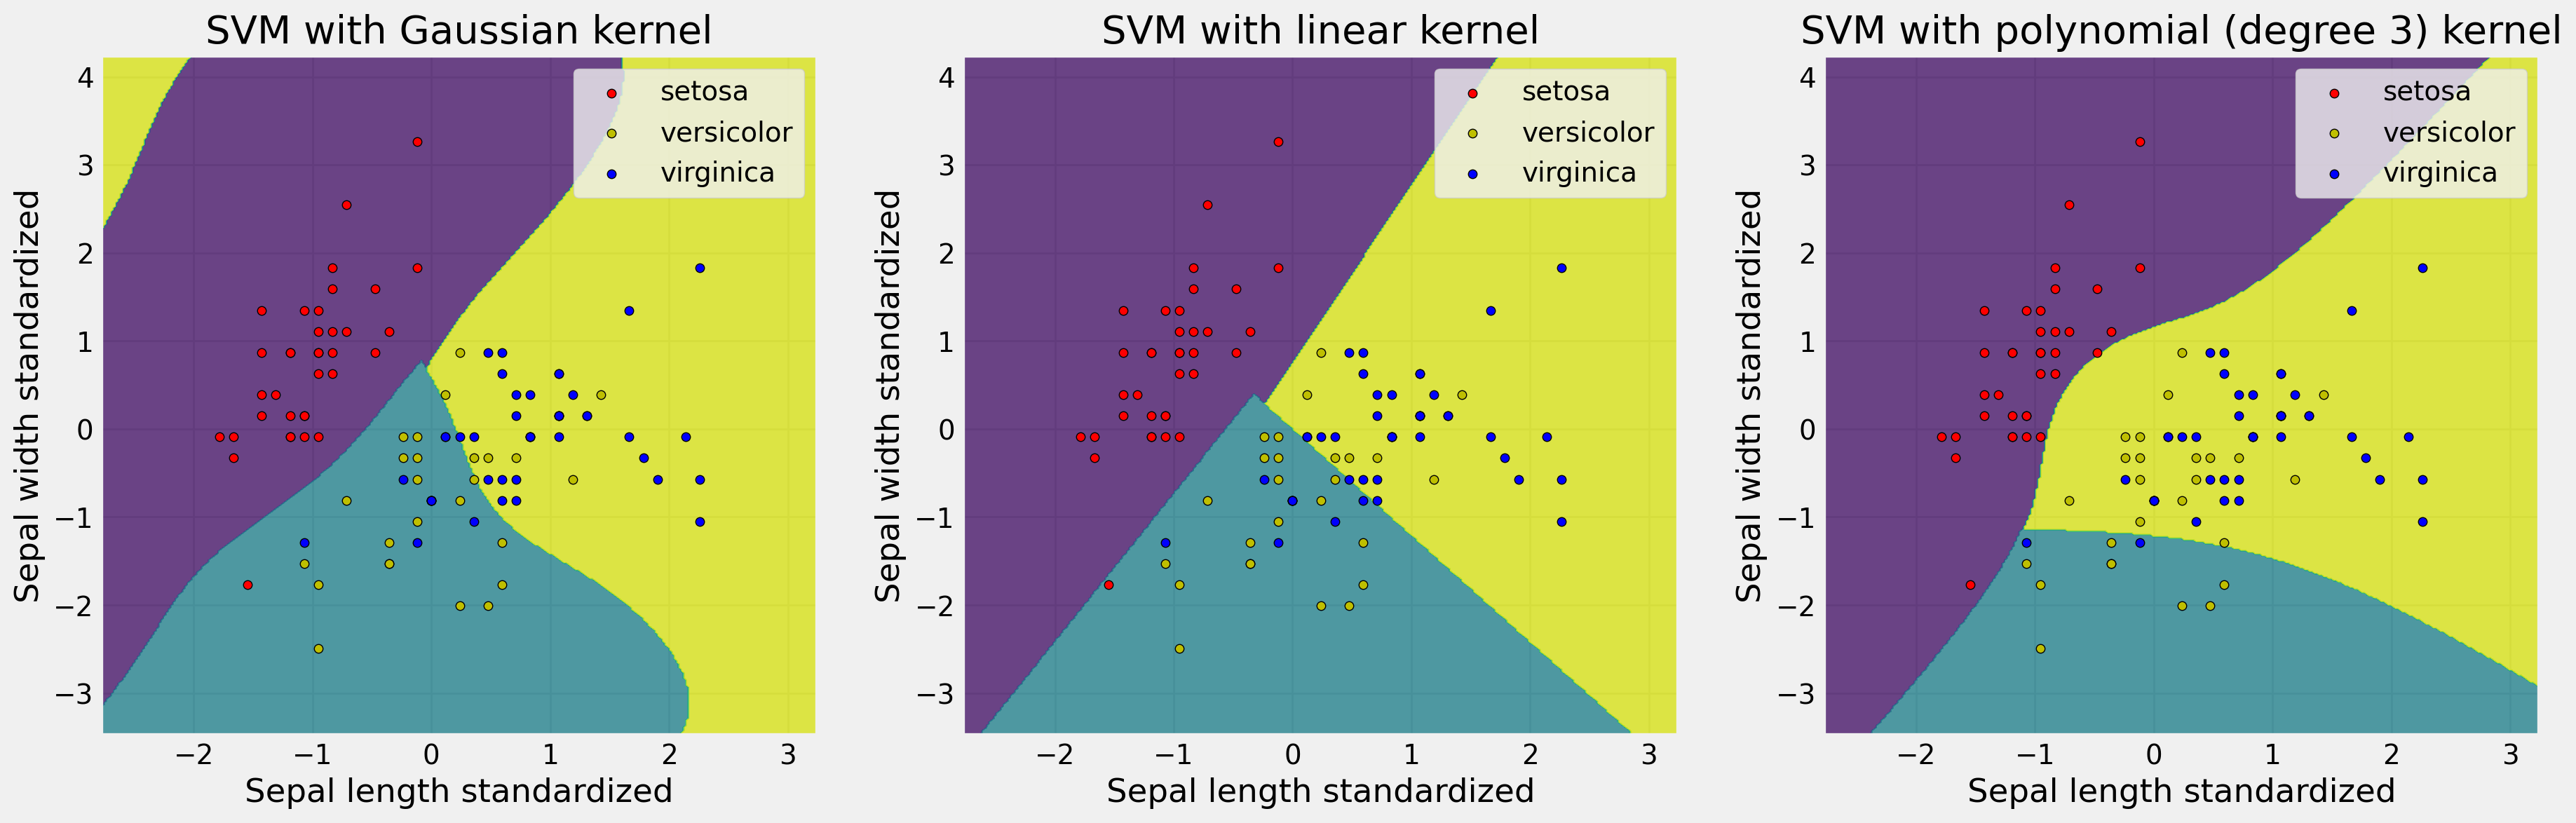

In [38]:
# A:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1) # 70% training and 30% test

# Standardizing the features (important for SVM models)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Create a mesh to plot in
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

kernels = ['rbf', 'linear', 'poly']
titles = ['SVM with Gaussian kernel',
          'SVM with linear kernel',
          'SVM with polynomial (degree 3) kernel']

fig, sub = plt.subplots(1, 3, figsize=(20, 6))

for clf, title, ax in zip(kernels, titles, sub.flatten()):
    # Train SVM
    if clf == 'poly':
        svm = SVC(kernel=clf, degree=3, random_state=1)  # explicitly setting degree for 'poly' kernel
    else:
        svm = SVC(kernel=clf, random_state=1)  # degree will default to its default value (which is 3) for 'rbf' and 'linear'
    svm.fit(X_train_std, y_train)

    # Predict and plot in each region
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y_train == i)
        ax.scatter(X_train_std[idx, 0], X_train_std[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=20)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length standardized')
    ax.set_ylabel('Sepal width standardized')
    ax.set_title(title)
    ax.legend()

plt.show()

### 10. [Bonus] Compare SVM kernels visually on generated data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

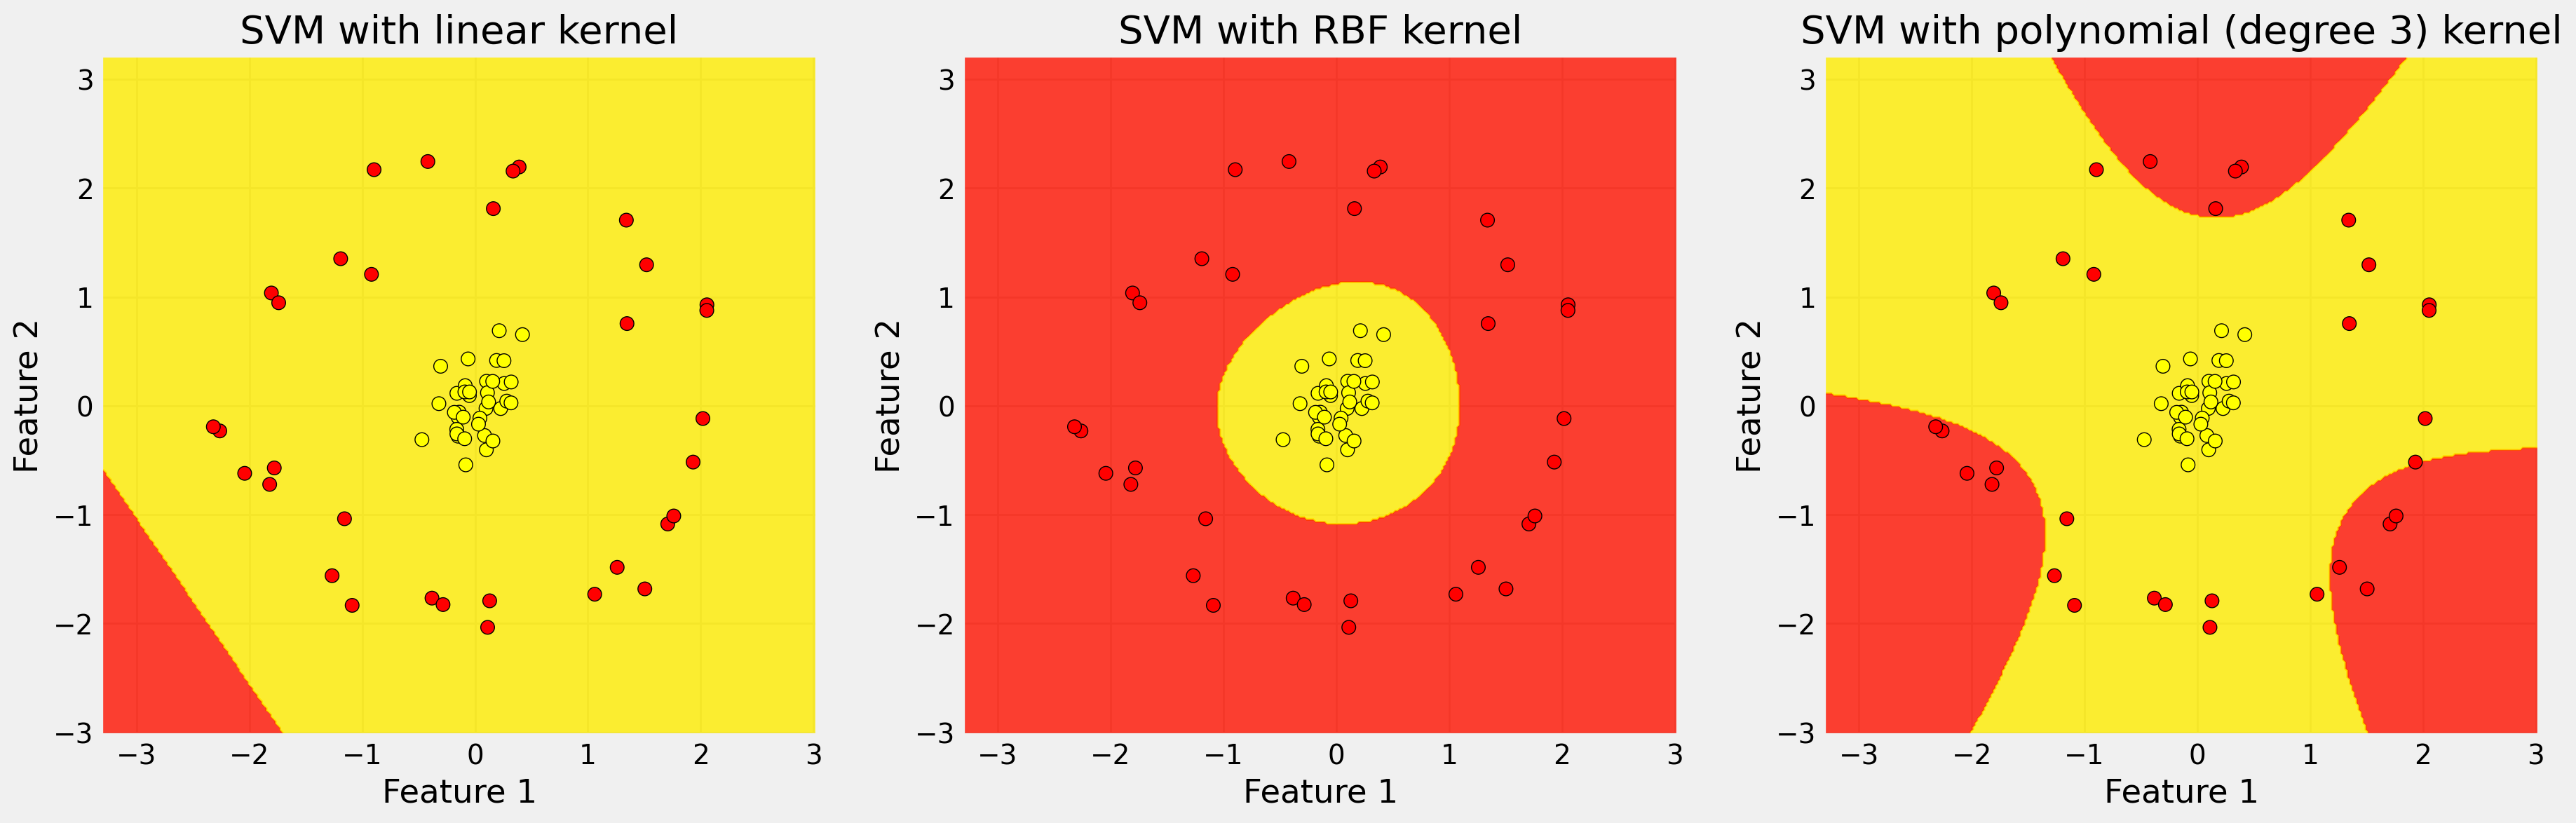

In [42]:
# A:
from sklearn.datasets import make_circles

# Create synthetic dataset
X, y = make_circles(100, factor=.1, noise=.1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Standardizing the features (important for SVM models)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Create a mesh to plot in
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# Define SVM classifiers with different kernels
classifiers = [SVC(kernel='linear', random_state=1),
               SVC(kernel='rbf', random_state=1),
               SVC(kernel='poly', degree=3, random_state=1)]

titles = ['SVM with linear kernel',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 3) kernel']

# Set up plot
fig, sub = plt.subplots(1, 3, figsize=(20, 6))

for clf, title, ax in zip(classifiers, titles, sub.flatten()):
    # Train SVM
    clf.fit(X_train_std, y_train)

    # Predict and plot in each region
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='autumn')

    # Plot also the training points
    ax.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, s=50, edgecolor='k', cmap='autumn')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)

plt.show()